## VS Code Data Science Tutorial (Titanic Data)

Tutorial: 
https://code.visualstudio.com/docs/python/data-science-tutorial

Data: https://www.openml.org/d/40945

Metadata: 
http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html

Note: I don't think the jump to a nueral network was worth the extra ~5% accuracy gain. The metadata suggests this a good data set to demonstrate binary logistic regression.

Another note: Titanic data is very interesting, from socio-economic and historical perspectives. 

## Prepare Data

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

In [4]:
data.replace('?', np.nan, inplace=True)
data = data.astype({'age': np.float64, 'fare': np.float64})
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

## Plot Data

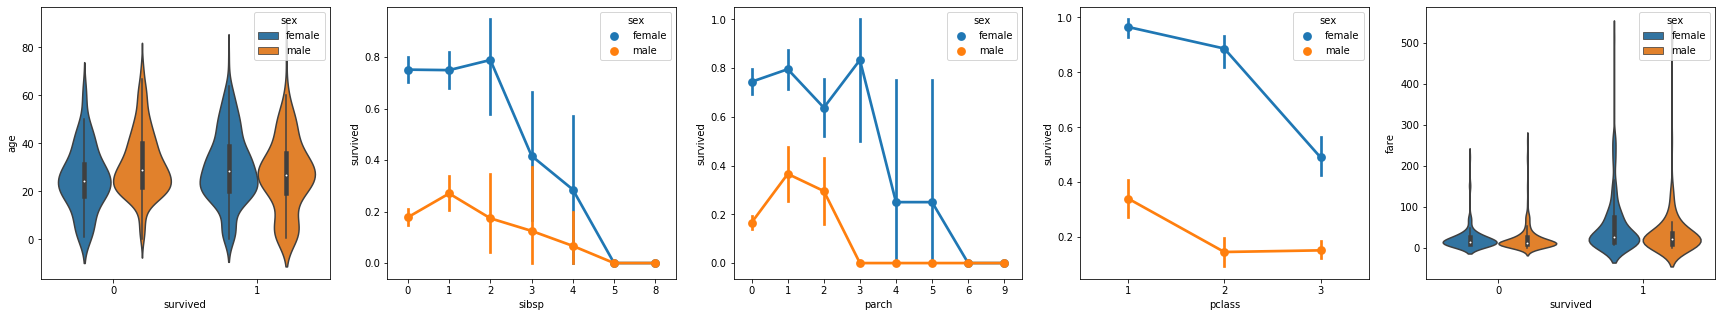

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x='survived',y='age',hue='sex',data=data,ax=axs[0])
sns.pointplot(x='sibsp',y='survived',hue='sex',data=data,ax=axs[1])
sns.pointplot(x='parch',y='survived',hue='sex',data=data,ax=axs[2])
sns.pointplot(x='pclass',y='survived',hue='sex',data=data,ax=axs[3])
sns.violinplot(x='survived',y='fare',hue='sex',data=data,ax=axs[4])

## Calculate Correlation

In [11]:
data.replace({'male':1,'female':0}, inplace=True)
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [13]:
data['relatives']=data.apply(lambda row: int((row['sibsp']+row['parch'])>0),axis=1)
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [14]:
data = data[['sex','pclass','age','relatives','fare','survived']].dropna()

## Train and Evaluate Model

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [23]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,predict_test))

0.7464114832535885


## Improve Accuracy with Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential()

In [27]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 726us/step - loss: 0.6926 - accuracy: 0.5478
Epoch 2/50
27/27 [==============================] - 0s 639us/step - loss: 0.6906 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 669us/step - loss: 0.6872 - accuracy: 0.6100
Epoch 4/50
27/27 [==============================] - 0s 590us/step - loss: 0.6801 - accuracy: 0.7285
Epoch 5/50
27/27 [==============================] - 0s 663us/step - loss: 0.6670 - accuracy: 0.7691
Epoch 6/50
27/27 [==============================] - 0s 677us/step - loss: 0.6508 - accuracy: 0.7679
Epoch 7/50
27/27 [==============================] - 0s 687us/step - loss: 0.6321 - accuracy: 0.7656
Epoch 8/50
27/27 [==============================] - 0s 657us/step - loss: 0.6142 - accuracy: 0.7644
Epoch 9/50
27/27 [==============================] - 0s 667us/step - loss: 0.6007 - accuracy: 0.7644
Epoch 10/50
27/27 [==============================] - 0s 726us/step - loss: 0.5887 - accuracy: 0.7715

In [30]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.7942583732057417
